Reading the Excel file to display the preprocessed content that has been extracted from the PDFS in the dataset

In [1]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd # Import pandas

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Assuming your CSV file is named 'your_file.csv' and is in the current directory
try:
    # Use pd.read_excel() to read an Excel file
    df = pd.read_excel('outputs.xlsx')  # Load DataFrame here if not already loaded
except FileNotFoundError:
    print("Error: 'your_file.csv' not found. Please make sure the file exists in the current directory.")
    exit()

# Check for required columns
if not all(col in df.columns for col in ['Filename', 'content']):
    print("Error: The CSV file must contain columns named 'Filename' and 'content'.")
    exit()

def clean_text(text):
  text = text.lower()
  text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
  text = re.sub(r'\d+', '', text)  # Remove numbers
  return text

def tokenize_text(text):
  return word_tokenize(text)

def lemmatize_text(tokens):
  lemmatizer = WordNetLemmatizer()
  return [lemmatizer.lemmatize(token) for token in tokens]


df['clean_content'] = df['content'].apply(clean_text)
df['tokens_content'] = df['clean_content'].apply(tokenize_text)
df['lemmas_content'] = df['tokens_content'].apply(lemmatize_text)

df.head(57)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Filename,content,clean_content,tokens_content,lemmas_content
0,pro06.pdf,Bank Branches as Smart Environments: Introduci...,bank branches as smart environments introducin...,"[bank, branches, as, smart, environments, intr...","[bank, branch, a, smart, environment, introduc..."
1,pro05.pdf,Promoting SME Innovation through Collaboration...,promoting sme innovation through collaboration...,"[promoting, sme, innovation, through, collabor...","[promoting, sme, innovation, through, collabor..."
2,pro40.pdf,Cognitive Based Decision Support for Water \nM...,cognitive based decision support for water \nm...,"[cognitive, based, decision, support, for, wat...","[cognitive, based, decision, support, for, wat..."
3,pro41.pdf,Achieving Smart Water Network Management throu...,achieving smart water network management throu...,"[achieving, smart, water, network, management,...","[achieving, smart, water, network, management,..."
4,pro24.pdf,Development of a Collaborative Platform for Cl...,development of a collaborative platform for cl...,"[development, of, a, collaborative, platform, ...","[development, of, a, collaborative, platform, ..."
5,pro35.pdf,The Robot Who Loved Me: Building Consciousness...,the robot who loved me building consciousness ...,"[the, robot, who, loved, me, building, conscio...","[the, robot, who, loved, me, building, conscio..."
6,pro42.pdf,Collaborative Network for District Energy Oper...,collaborative network for district energy oper...,"[collaborative, network, for, district, energy...","[collaborative, network, for, district, energy..."
7,pro02.pdf,Collaborative Transformation Systems - Path to...,collaborative transformation systems path to ...,"[collaborative, transformation, systems, path,...","[collaborative, transformation, system, path, ..."
8,pro03.pdf,Need and Solution to Transform the Manufacturi...,need and solution to transform the manufacturi...,"[need, and, solution, to, transform, the, manu...","[need, and, solution, to, transform, the, manu..."
9,pro39.pdf,Ontology-Based Semantic Modeling for Automated...,ontologybased semantic modeling for automated ...,"[ontologybased, semantic, modeling, for, autom...","[ontologybased, semantic, modeling, for, autom..."


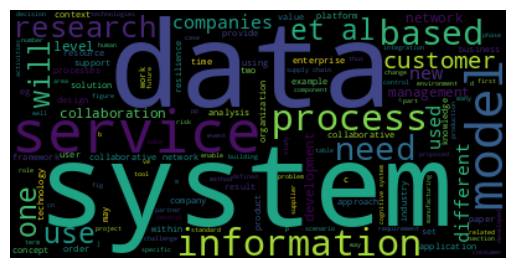

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned text into a single string
text = " ".join(df['clean_content'].astype(str))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


**NRC** **Lexicon**

In [3]:
!pip install NRCLex

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43309 sha256=3d4ded5a596d03409b14689021d9f7dedecd4d3221fdeea9efaded3cdccc06f3
  Stored in directory: /root/.cache/pip/wheels/ed/ac/fa/7afddefd14f51c4a963ed291b9052746ed3929473e5a33118d
Successfully built NRCLex


In [4]:
from nrclex import NRCLex

def get_emotions(tokens):
  """Gets emotions from text using NRCLex."""
  text = " ".join(tokens)
  emotion_scores = NRCLex(text).affect_frequencies
  return emotion_scores

df['emotions_content'] = df['lemmas_content'].apply(get_emotions)

df.head(59)

,Filename,content,clean_content,tokens_content,lemmas_content,emotions_content
0,pro06.pdf,Bank Branches as Smart Environments: Introduci...,bank branches as smart environments introducin...,"[bank, branches, as, smart, environments, intr...","[bank, branch, a, smart, environment, introduc...","{'fear': 0.10984540276647681, 'anger': 0.07078..."
1,pro05.pdf,Promoting SME Innovation through Collaboration...,promoting sme innovation through collaboration...,"[promoting, sme, innovation, through, collabor...","[promoting, sme, innovation, through, collabor...","{'fear': 0.035849056603773584, 'anger': 0.0188..."
2,pro40.pdf,Cognitive Based Decision Support for Water \nM...,cognitive based decision support for water \nm...,"[cognitive, based, decision, support, for, wat...","[cognitive, based, decision, support, for, wat...","{'fear': 0.041156840934371525, 'anger': 0.0189..."
3,pro41.pdf,Achieving Smart Water Network Management throu...,achieving smart water network management throu...,"[achieving, smart, water, network, management,...","[achieving, smart, water, network, management,...","{'fear': 0.0508274231678487, 'anger': 0.036643..."
4,pro24.pdf,Development of a Collaborative Platform for Cl...,development of a collaborative platform for cl...,"[development, of, a, collaborative, platform, ...","[development, of, a, collaborative, platform, ...","{'fear': 0.05069124423963134, 'anger': 0.03072..."
5,pro35.pdf,The Robot Who Loved Me: Building Consciousness...,the robot who loved me building consciousness ...,"[the, robot, who, loved, me, building, conscio...","[the, robot, who, loved, me, building, conscio...","{'fear': 0.07928994082840236, 'anger': 0.02721..."
6,pro42.pdf,Collaborative Network for District Energy Oper...,collaborative network for district energy oper...,"[collaborative, network, for, district, energy...","[collaborative, network, for, district, energy...","{'fear': 0.03529411764705882, 'anger': 0.02352..."
7,pro02.pdf,Collaborative Transformation Systems - Path to...,collaborative transformation systems path to ...,"[collaborative, transformation, systems, path,...","[collaborative, transformation, system, path, ...","{'fear': 0.050462573591253154, 'anger': 0.0344..."
8,pro03.pdf,Need and Solution to Transform the Manufacturi...,need and solution to transform the manufacturi...,"[need, and, solution, to, transform, the, manu...","[need, and, solution, to, transform, the, manu...","{'fear': 0.04074702886247878, 'anger': 0.01018..."
9,pro39.pdf,Ontology-Based Semantic Modeling for Automated...,ontologybased semantic modeling for automated ...,"[ontologybased, semantic, modeling, for, autom...","[ontologybased, semantic, modeling, for, autom...","{'fear': 0.08588957055214724, 'anger': 0.04447..."


              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         1
    positive       1.00      1.00      1.00        55
       trust       1.00      1.00      1.00         1

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



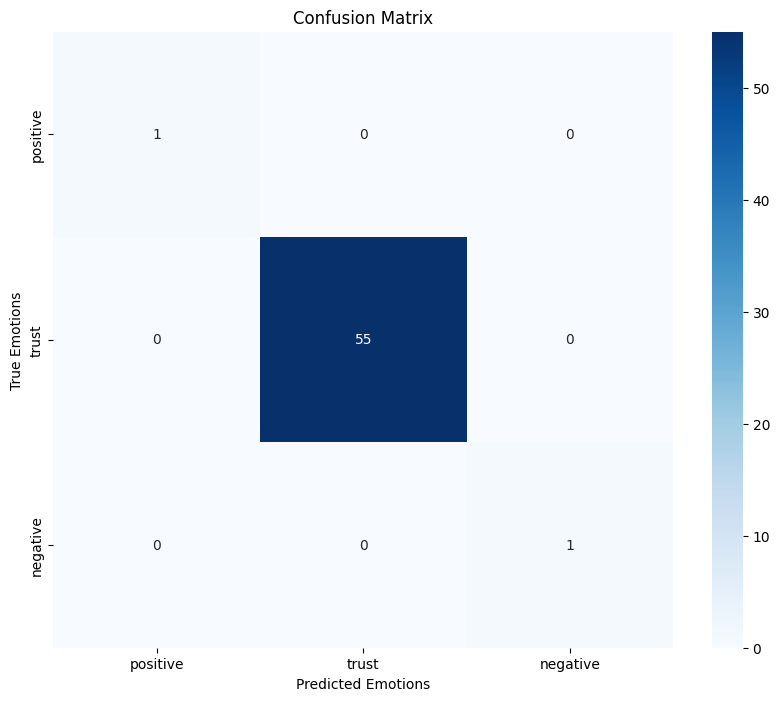

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



df['true_emotions'] = df['emotions_content'].apply(lambda x: max(x, key=x.get) if x else 'None')


# Function to get the dominant emotion
def get_dominant_emotion(emotion_dict):
    if not emotion_dict:
        return "None"
    return max(emotion_dict, key=emotion_dict.get)

# Getting the dominant emotions from the predicted scores
df['predicted_emotions'] = df['emotions_content'].apply(get_dominant_emotion)


# Calculate performance metrics
print(classification_report(df['true_emotions'], df['predicted_emotions']))


# Create and display confusion matrix
cm = confusion_matrix(df['true_emotions'], df['predicted_emotions'])
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=df['predicted_emotions'].unique(),
            yticklabels=df['true_emotions'].unique())
plt.xlabel('Predicted Emotions')
plt.ylabel('True Emotions')
plt.title('Confusion Matrix')
plt.show()


In [7]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np




true_emotions_list = ['joy', 'anger', 'fear', 'surprise', 'positive', 'negative', 'sadness', 'anticip', 'disgust', 'anticipation', 'trust'] + ['unknown'] * (len(df) - 11)  # Adjust to match DataFrame length

# Function to prepare data (adjust based on your df structure)
def prepare_data(df):
    # Extract predicted emotions (from your NRCLex code)
    predicted_emotions = df['emotions_content'].tolist()

    assert len(predicted_emotions) == len(true_emotions_list) == 57, "Mismatch in data length"

    return predicted_emotions, true_emotions_list

# Function to evaluate model performance
def evaluate_model(predicted, true):

    y_pred = [max(p.items(), key=lambda x: x[1])[0] if isinstance(p, dict) else p for p in predicted]
    y_true = [max(t.items(), key=lambda x: x[1])[0] if isinstance(t, dict) else t for t in true]

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Generate classification report
    report = classification_report(y_true, y_pred)

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    return accuracy, precision, recall, f1, report, cm

# Main execution
if __name__ == "__main__":

    df['true_emotions'] = true_emotions_list

    # Prepare data
    predicted_emotions, true_emotions = prepare_data(df)

    # Evaluate
    accuracy, precision, recall, f1, report, cm = evaluate_model(predicted_emotions, true_emotions)

    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:\n", report)
    print("\nConfusion Matrix:\n", cm)


Accuracy: 0.0175
Precision: 0.0003
Recall: 0.0175
F1 Score: 0.0006

Classification Report:
               precision    recall  f1-score   support

       anger       0.00      0.00      0.00         1
     anticip       0.00      0.00      0.00         1
anticipation       0.00      0.00      0.00         1
     disgust       0.00      0.00      0.00         1
        fear       0.00      0.00      0.00         1
         joy       0.00      0.00      0.00         1
    negative       0.00      0.00      0.00         1
    positive       0.02      1.00      0.04         1
     sadness       0.00      0.00      0.00         1
    surprise       0.00      0.00      0.00         1
       trust       0.00      0.00      0.00         1
     unknown       0.00      0.00      0.00        46

    accuracy                           0.02        57
   macro avg       0.00      0.08      0.00        57
weighted avg       0.00      0.02      0.00        57


Confusion Matrix:
 [[ 0  0  0  0  0  0  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [8]:
# Creating an empty list to store the data for the table
table_data = []

# Iterate through the DataFrame
for index, row in df.iterrows():
    filename = row['Filename']
    emotions = row['emotions_content']

    # Converting the emotions dictionary to a list of key-value pairs
    emotion_list = list(emotions.items())

    # Appending filename and emotion scores to the table_data list
    table_data.append([filename] + [score for emotion, score in emotion_list])

# Creating a list of column headers
header = ['Filename'] + list(df['emotions_content'].iloc[0].keys())

# Creating the Pandas DataFrame
emotions_df = pd.DataFrame(table_data, columns=header)

# Displaying the DataFrame
emotions_df

,Filename,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
0,pro06.pdf,0.109845,0.070789,0.0,0.213995,0.023596,0.296989,0.106591,0.039870,0.032547,0.028478,0.077299
1,pro05.pdf,0.035849,0.018868,0.0,0.215094,0.033962,0.398113,0.056604,0.018868,0.007547,0.067925,0.147170
2,pro40.pdf,0.041157,0.018910,0.0,0.282536,0.030033,0.369299,0.063404,0.011123,0.004449,0.035595,0.143493
3,pro41.pdf,0.050827,0.036643,0.0,0.224586,0.017730,0.355792,0.087470,0.048463,0.008274,0.042553,0.127660
4,pro24.pdf,0.050691,0.030722,0.0,0.224270,0.030722,0.354839,0.053763,0.039939,0.006144,0.055300,0.153610
5,pro35.pdf,0.079290,0.027219,0.0,0.191716,0.022485,0.383432,0.093491,0.060355,0.016568,0.046154,0.079290
6,pro42.pdf,0.035294,0.023529,0.0,0.258824,0.023529,0.374790,0.048739,0.010084,0.006723,0.052101,0.166387
7,pro02.pdf,0.050463,0.034483,0.0,0.214466,0.038688,0.401177,0.057191,0.024390,0.005046,0.047098,0.126997
8,pro03.pdf,0.040747,0.010187,0.0,0.273345,0.020374,0.419355,0.049236,0.028862,0.006791,0.040747,0.110357
9,pro39.pdf,0.085890,0.044479,0.0,0.226994,0.033742,0.266871,0.144172,0.076687,0.056748,0.018405,0.046012


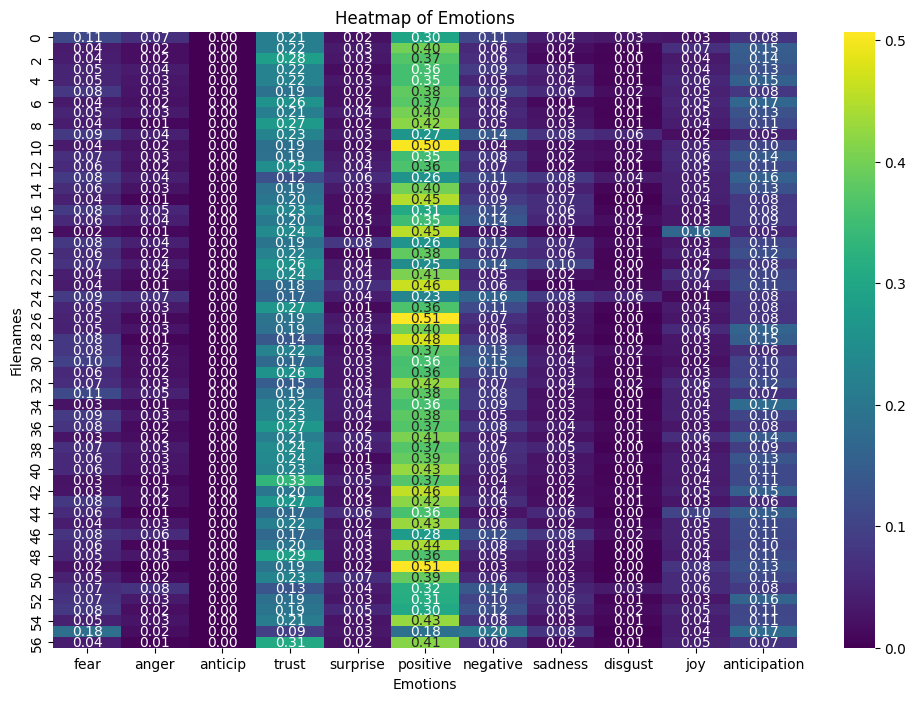

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'emotions_df' is already created as in your previous code

# Prepare data for the heatmap
emotions_matrix = emotions_df.drop('Filename', axis=1)  # Remove the filename column

# Convert all columns to numeric, coercing errors to NaN
emotions_matrix = emotions_matrix.apply(pd.to_numeric, errors='coerce')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(emotions_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Heatmap of Emotions')
plt.xlabel('Emotions')
plt.ylabel('Filenames')
plt.show()


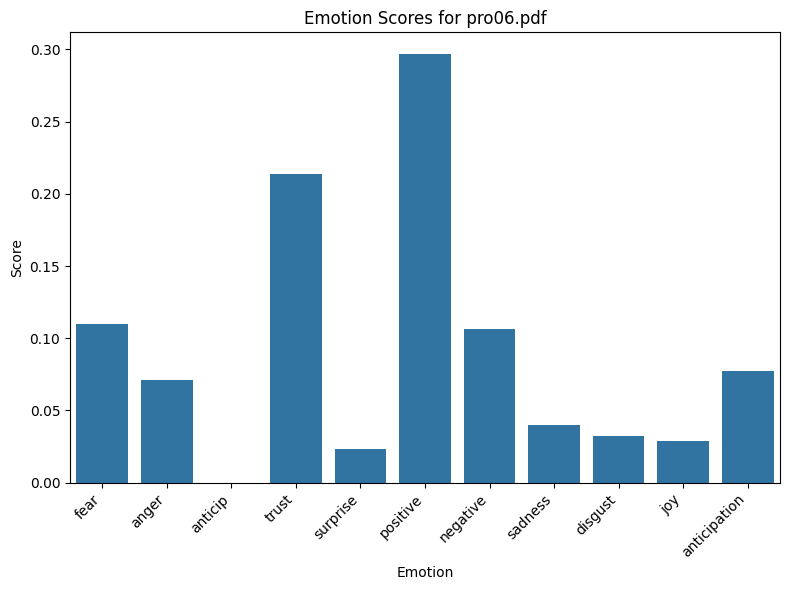

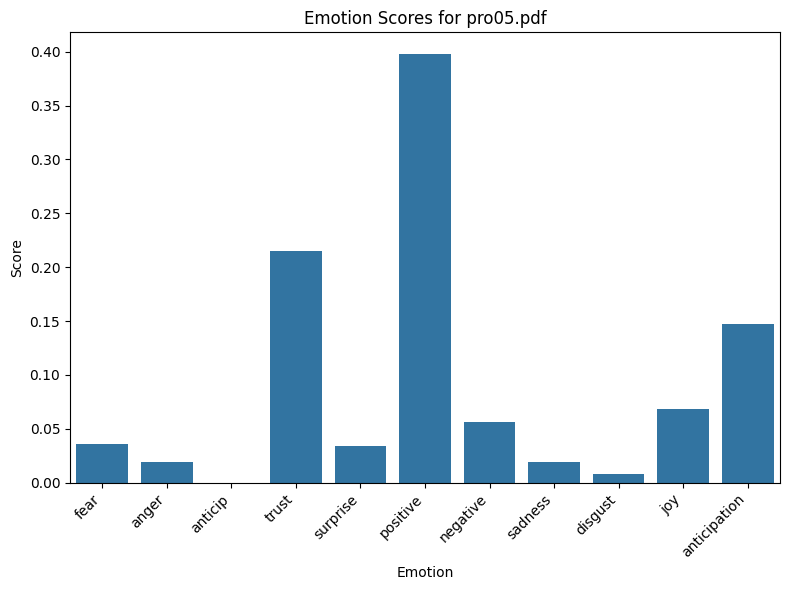

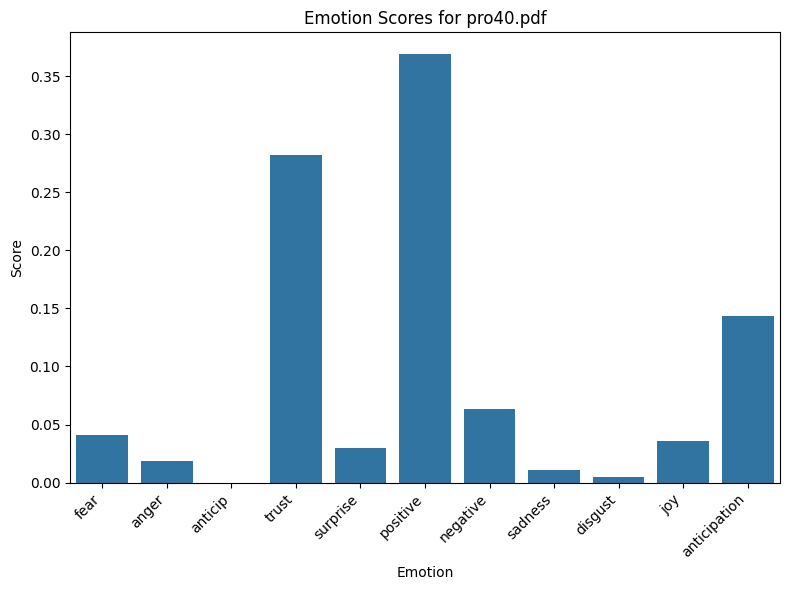

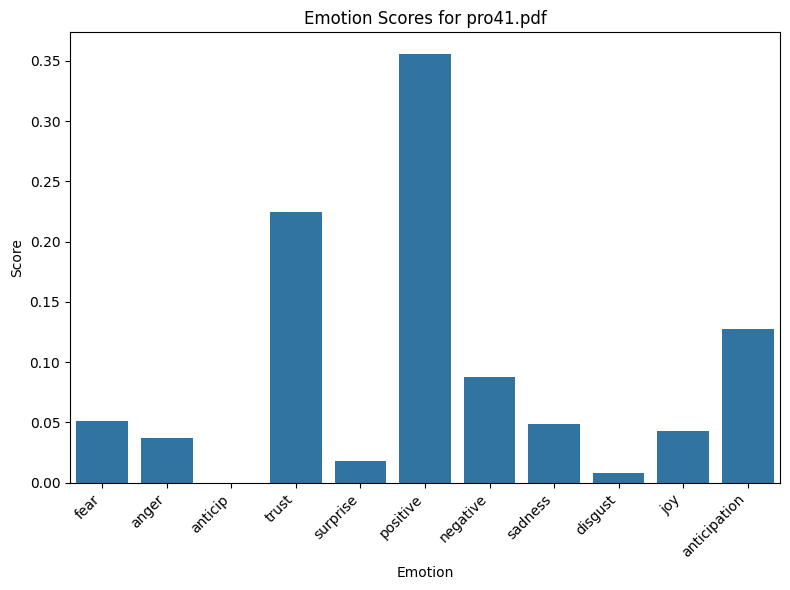

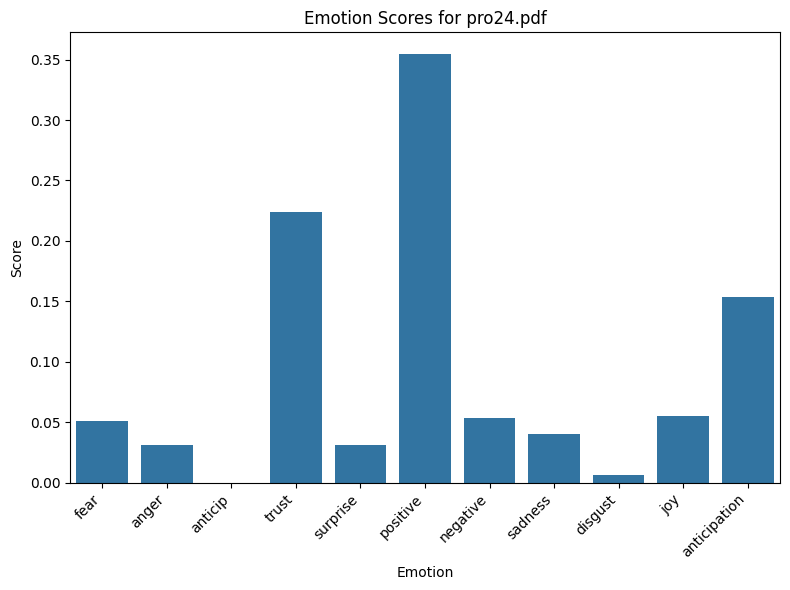

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


selected_papers = ['pro06.pdf', 'pro05.pdf', 'pro40.pdf', 'pro41.pdf', 'pro24.pdf']

for paper in selected_papers:
    # Find the row corresponding to the selected paper
    paper_row = df[df['Filename'] == paper]
    if not paper_row.empty:
        paper_emotions = paper_row['emotions_content'].iloc[0]

        # Convert the emotion dictionary to a DataFrame for plotting
        emotions_df_paper = pd.DataFrame(list(paper_emotions.items()), columns=['Emotion', 'Score'])

        # Create the bar plot
        plt.figure(figsize=(8, 6))
        sns.barplot(x='Emotion', y='Score', data=emotions_df_paper)
        plt.title(f'Emotion Scores for {paper}')
        plt.xlabel('Emotion')
        plt.ylabel('Score')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Warning: Paper '{paper}' not found in the DataFrame.")


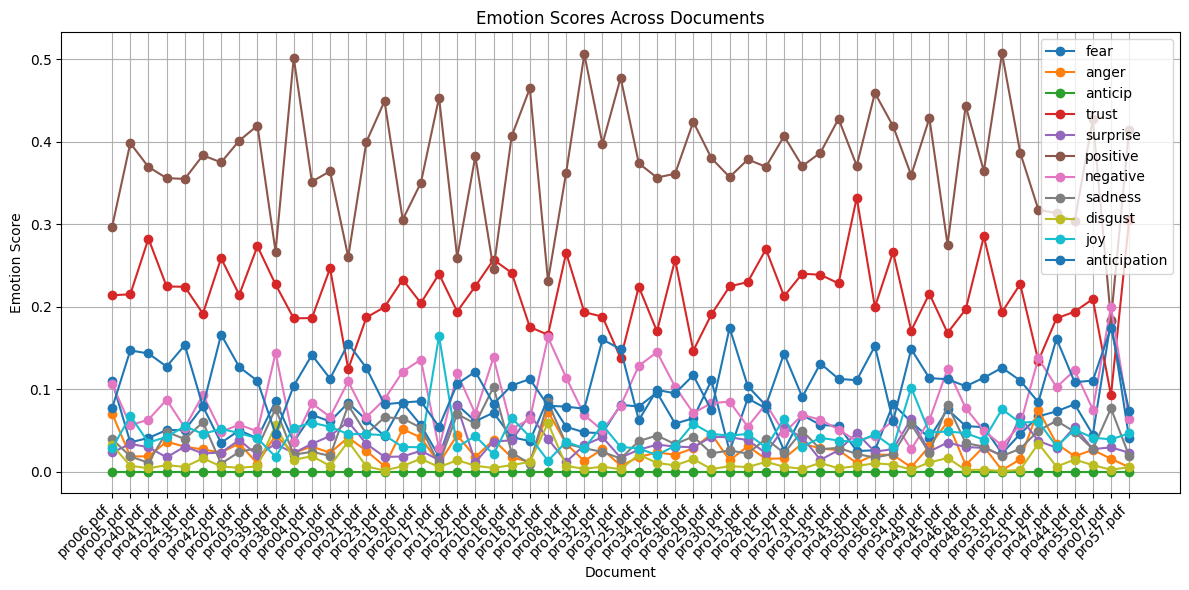

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

if isinstance(df['emotions_content'].iloc[0], str):
    df['emotions_content'] = df['emotions_content'].apply(eval)

# Creating an empty list to store the data for the table
table_data = []

# Iterating through the DataFrame
for index, row in df.iterrows():
    filename = row['Filename']
    emotions = row['emotions_content']

    # Converting the emotions dictionary to a list of key-value pairs
    emotion_list = list(emotions.items())

    # Appending filename and emotion scores to the table_data list
    table_data.append([filename] + [score for emotion, score in emotion_list])

# Creating a list of column headers
header = ['Filename'] + list(df['emotions_content'].iloc[0].keys())

# Creating the Pandas DataFrame
emotions_df = pd.DataFrame(table_data, columns=header)

# Visualizing all emotions in one line graph
plt.figure(figsize=(12, 6))

# Getting the list of emotions (all columns except 'filename')
emotions = [col for col in emotions_df.columns if col != 'Filename']

# Plotting each emotion as a separate line
for emotion in emotions:
    plt.plot(emotions_df['Filename'], emotions_df[emotion], label=emotion, marker='o')

# Customizing the plot
plt.title('Emotion Scores Across Documents')
plt.xlabel('Document')
plt.ylabel('Emotion Score')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()

<ipython-input-12-4c26408c468e>:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 2000x800 with 0 Axes>

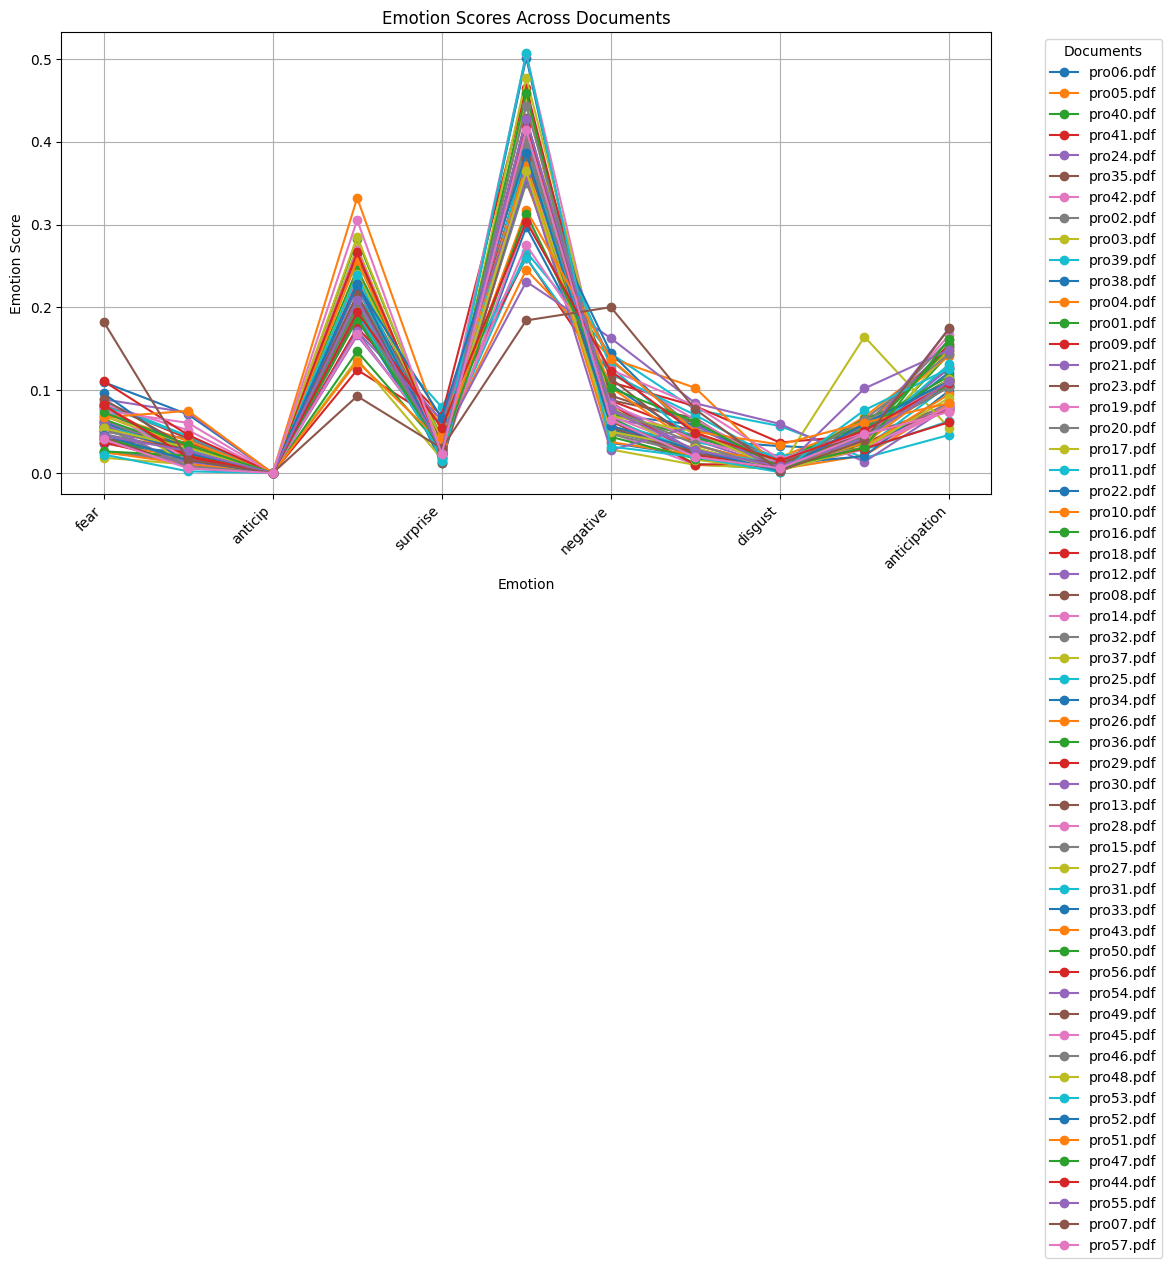

In [12]:
# Visualizing all emotions in one line graph
plt.figure(figsize=(20, 8))

# Get the list of emotions (all columns except 'filename')
emotions = [col for col in emotions_df.columns if col != 'Filename']

# Transposing the DataFrame for easier plotting
emotions_df_transposed = emotions_df.set_index('Filename').T

# Plotting each emotion as a separate line
emotions_df_transposed.plot(marker='o', figsize=(12, 6))


# Customizing the plot
plt.title('Emotion Scores Across Documents')
plt.xlabel('Emotion')
plt.ylabel('Emotion Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Documents', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
# Finding the papers with the highest values for each emotion
highest_trust = emotions_df.loc[emotions_df['trust'].idxmax()]
highest_anticipation = emotions_df.loc[emotions_df['anticipation'].idxmax()]
highest_positive = emotions_df.loc[emotions_df['positive'].idxmax()]
highest_joy = emotions_df.loc[emotions_df['joy'].idxmax()]


print("Paper with highest trust score:", highest_trust['Filename'], " (Trust Score:", highest_trust['trust'], ")")
print("Paper with highest anticipation score:", highest_anticipation['Filename'], " (Anticipation Score:", highest_anticipation['anticipation'], ")")
print("Paper with highest positive score:", highest_positive['Filename'], " (Positive Score:", highest_positive['positive'], ")")
print("Paper with highest joy score:", highest_joy['Filename'], " (Joy Score:", highest_joy['joy'], ")")


Paper with highest trust score: pro43.pdf  (Trust Score: 0.3321256038647343 )
Paper with highest anticipation score: pro07.pdf  (Anticipation Score: 0.17463617463617465 )
Paper with highest positive score: pro53.pdf  (Positive Score: 0.506951871657754 )
Paper with highest joy score: pro17.pdf  (Joy Score: 0.16463059918557302 )


In [14]:
import pandas as pd

average_scores = emotions_df.drop(columns=['Filename']).mean()

# Creating a new DataFrame for the table
average_scores_df = pd.DataFrame({'Emotion': average_scores.index, 'Average Score': average_scores.values})

# Displaying the table
average_scores_df

,Emotion,Average Score
0,fear,0.061407
1,anger,0.027119
2,anticip,0.000000
3,trust,0.213845
4,surprise,0.033395
5,positive,0.374594
6,negative,0.082144
7,sadness,0.038886
8,disgust,0.011289
9,joy,0.045874


from matplotlib import pyplot as plt
average_scores_df['Average Score'].plot(kind='hist', bins=20, title='Average Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
average_scores_df['Average Score'].plot(kind='line', figsize=(8, 4), title='Average Score')
plt.gca().spines[['top', 'right']].set_visible(False)

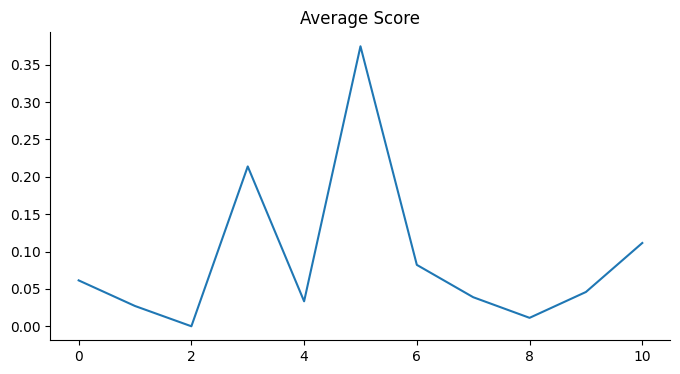

In [15]:
from matplotlib import pyplot as plt
average_scores_df['Average Score'].plot(kind='line', figsize=(8, 4), title='Average Score')
plt.gca().spines[['top', 'right']].set_visible(False)

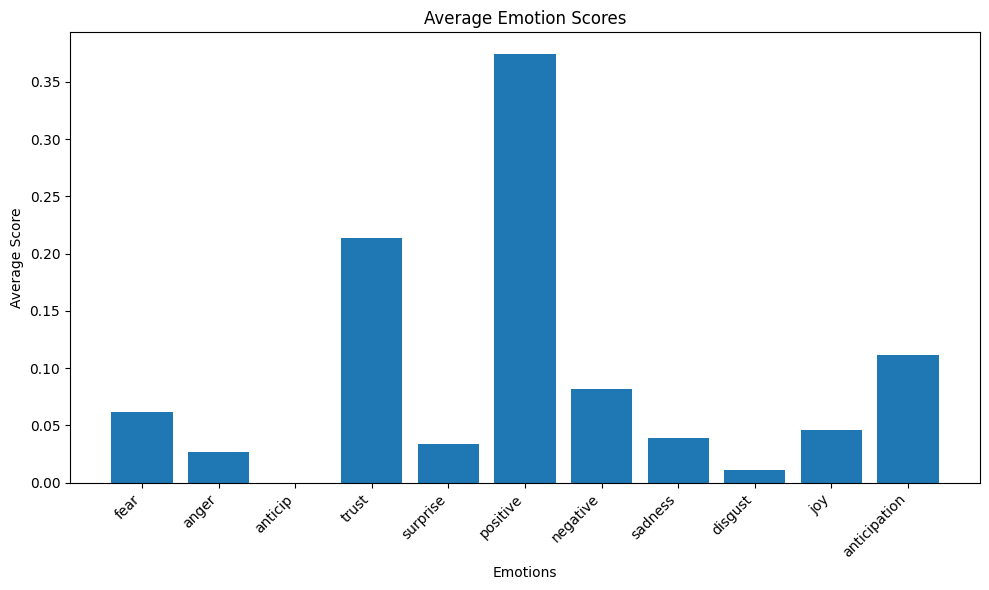

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(average_scores_df['Emotion'], average_scores_df['Average Score'])
plt.xlabel("Emotions")
plt.ylabel("Average Score")
plt.title("Average Emotion Scores")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


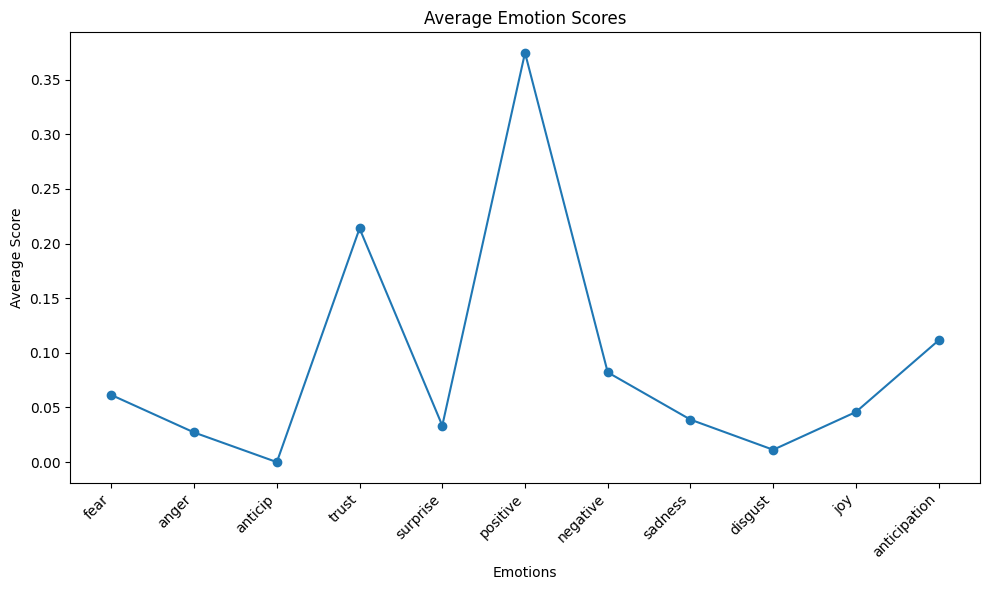

In [17]:
# Calculating the average score for each emotion, excluding non-numeric columns
average_scores = emotions_df.drop(columns=['Filename']).mean()

# Creating a new DataFrame for the table
average_scores_df = pd.DataFrame({'Emotion': average_scores.index, 'Average Score': average_scores.values})

# Creating the line plot
plt.figure(figsize=(10, 6))
plt.plot(average_scores_df['Emotion'], average_scores_df['Average Score'], marker='o')
plt.xlabel("Emotions")
plt.ylabel("Average Score")
plt.title("Average Emotion Scores")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

         Emotion  Average Score
0           fear       0.061407
1          anger       0.027119
2        anticip       0.000000
3          trust       0.213845
4       surprise       0.033395
5       positive       0.374594
6       negative       0.082144
7        sadness       0.038886
8        disgust       0.011289
9            joy       0.045874
10  anticipation       0.111448


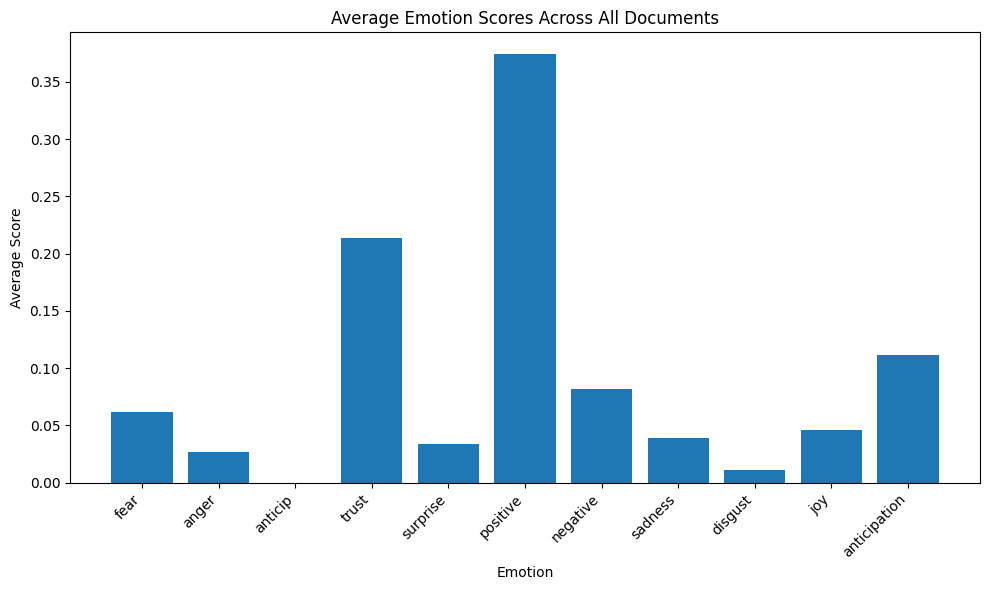

In [18]:
numeric_columns = emotions_df.select_dtypes(include=['number']).columns
average_scores = emotions_df[numeric_columns].drop(columns=['Filename'], errors='ignore').mean()

# Creating a new DataFrame for the average scores
average_scores_df = pd.DataFrame({'Emotion': average_scores.index, 'Average Score': average_scores.values})

# Displaying the average scores in a table
print(average_scores_df)

# Creating a bar chart of the average emotion scores
plt.figure(figsize=(10, 6))
plt.bar(average_scores_df['Emotion'], average_scores_df['Average Score'])
plt.xlabel('Emotion')
plt.ylabel('Average Score')
plt.title('Average Emotion Scores Across All Documents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd

# Create an empty list to store the data for the table
table_data = []

# Iterate through the DataFrame
for index, row in df.iterrows():
    filename = row['Filename']
    emotions = row['emotions_content']

    # Convert the emotions dictionary to a list of key-value pairs
    emotion_list = list(emotions.items())

    # Append filename and emotion scores to the table_data list
    table_data.append([filename] + [score for emotion, score in emotion_list])

# Create a list of column headers
header = ['Filename'] + list(df['emotions_content'].iloc[0].keys())

# Create the Pandas DataFrame
emotions_df = pd.DataFrame(table_data, columns=header)

# Calculate the total for each emotion (summing across all rows for each emotion column)
emotion_totals = emotions_df.drop(columns=['Filename']).sum()

# Create a new DataFrame to display the totals
totals_df = pd.DataFrame(emotion_totals, columns=['Total']).T

# Display the totals DataFrame
totals_df


,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
Total,3.500188,1.545779,0.0,12.189144,1.903523,21.351834,4.682191,2.216518,0.643485,2.61482,6.352519


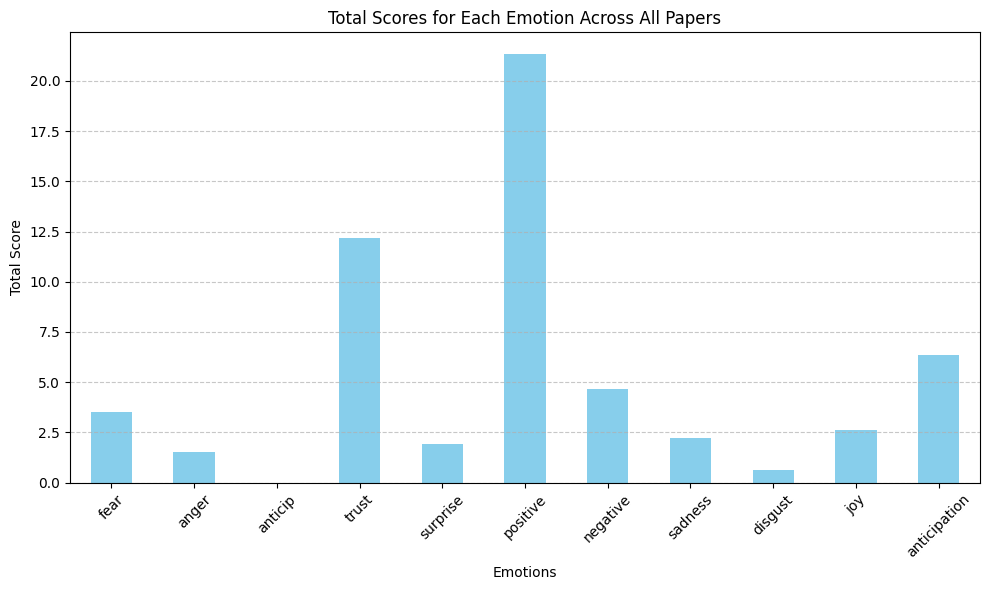

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Create an empty list to store the data for the table
table_data = []

# Iterate through the DataFrame
for index, row in df.iterrows():
    filename = row['Filename']
    emotions = row['emotions_content']

    # Convert the emotions dictionary to a list of key-value pairs
    emotion_list = list(emotions.items())

    # Append filename and emotion scores to the table_data list
    table_data.append([filename] + [score for emotion, score in emotion_list])

# Create a list of column headers
header = ['Filename'] + list(df['emotions_content'].iloc[0].keys())

# Create the Pandas DataFrame
emotions_df = pd.DataFrame(table_data, columns=header)

# Calculating the total for each emotion (summing across all rows for each emotion column)
emotion_totals = emotions_df.drop(columns=['Filename']).sum()

# Creating a bar plot of the emotion totals
plt.figure(figsize=(10, 6))
emotion_totals.plot(kind='bar', color='skyblue')
plt.title('Total Scores for Each Emotion Across All Papers')
plt.xlabel('Emotions')
plt.ylabel('Total Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

In [22]:
['joy', 'anger', 'fear', 'surprise', 'positive', 'negative', 'sadness', 'anticip', 'disgust', 'anticipation', 'trust' ]

['joy',
 'anger',
 'fear',
 'surprise',
 'positive',
 'negative',
 'sadness',
 'anticip',
 'disgust',
 'anticipation',
 'trust']

# *RoBERTa*

In [23]:
import pandas as pd

def read_excel(file_path):
    """Reads an Excel file and returns a pandas DataFrame."""
    df = pd.read_excel(file_path)
    return df

file_path = 'outputs.xlsx'
df = read_excel(file_path)
df.columns = ['Filename', 'Content' ]

if df is not None:
  print(df.head(58))

     Filename                                            Content
0   pro06.pdf  Bank Branches as Smart Environments: Introduci...
1   pro05.pdf  Promoting SME Innovation through Collaboration...
2   pro40.pdf  Cognitive Based Decision Support for Water \nM...
3   pro41.pdf  Achieving Smart Water Network Management throu...
4   pro24.pdf  Development of a Collaborative Platform for Cl...
5   pro35.pdf  The Robot Who Loved Me: Building Consciousness...
6   pro42.pdf  Collaborative Network for District Energy Oper...
7   pro02.pdf  Collaborative Transformation Systems - Path to...
8   pro03.pdf  Need and Solution to Transform the Manufacturi...
9   pro39.pdf  Ontology-Based Semantic Modeling for Automated...
10  pro38.pdf  Cognitive Services for Collaborative mHealth: ...
11  pro04.pdf  Collaborative Networks and the \n ‘Five Region...
12  pro01.pdf  The Relevance of Blockchain for Collaborative ...
13  pro09.pdf  Optimizing Humanitarian Aids: Formulating \nIn...
14  pro21.pdf  Complex Co

In [24]:
import spacy

# Load English model for spaCy
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    """
    Tokenizes, removes stopwords/punctuation, and lemmatizes the input text.
    Returns a string of processed tokens.
    """
    doc = nlp(text)
    tokens = []
    for token in doc:
        # Exclude stopwords, punctuation, and space tokens
        if not token.is_stop and not token.is_punct and not token.is_space:
            # Lemmatizin and lowercase
            tokens.append(token.lemma_.lower())
    return " ".join(tokens)

# Apply the preprocessing to each document
df["clean_content"] = df["Content"].apply(preprocess_text)
print(df[["Filename", "clean_content"]].head(57))

     Filename                                      clean_content
0   pro06.pdf  bank branches smart environments introduce cog...
1   pro05.pdf  promote sme innovation collaboration collectiv...
2   pro40.pdf  cognitive based decision support water managem...
3   pro41.pdf  achieve smart water network management semanti...
4   pro24.pdf  development collaborative platform closed loop...
5   pro35.pdf  robot love build consciousness models use huma...
6   pro42.pdf  collaborative network district energy operatio...
7   pro02.pdf  collaborative transformation systems path addr...
8   pro03.pdf  need solution transform manufacturing industry...
9   pro39.pdf  ontology base semantic modeling automated iden...
10  pro38.pdf  cognitive services collaborative mhealth onpar...
11  pro04.pdf  collaborative networks regions future andrew c...
12  pro01.pdf  relevance blockchain collaborative networked o...
13  pro09.pdf  optimize humanitarian aids formulating influen...
14  pro21.pdf  complex co

In [25]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [27]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

# Loading the tokenizer and model
model_name = "cardiffnlp/twitter-roberta-base-emotion"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

def roberta_emotion_detection(text):
    """Detects emotion in text using the roBERTa model."""
    # Truncate the input text to the maximum sequence length
    encoded_input = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return scores

df['roberta_scores'] = df['clean_content'].apply(roberta_emotion_detection)


labels = ['negative', 'neutral', 'positive']

for i in range(len(labels)):
  df[labels[i]] = df['roberta_scores'].apply(lambda x: x[i])

# Print the updated DataFrame to verify
print(df[['Filename', 'clean_content', 'negative', 'neutral', 'positive']].head(57))

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

     Filename                                      clean_content  negative  \
0   pro06.pdf  bank branches smart environments introduce cog...  0.232929   
1   pro05.pdf  promote sme innovation collaboration collectiv...  0.158675   
2   pro40.pdf  cognitive based decision support water managem...  0.217797   
3   pro41.pdf  achieve smart water network management semanti...  0.313662   
4   pro24.pdf  development collaborative platform closed loop...  0.149205   
5   pro35.pdf  robot love build consciousness models use huma...  0.169464   
6   pro42.pdf  collaborative network district energy operatio...  0.164679   
7   pro02.pdf  collaborative transformation systems path addr...  0.198237   
8   pro03.pdf  need solution transform manufacturing industry...  0.131316   
9   pro39.pdf  ontology base semantic modeling automated iden...  0.323968   
10  pro38.pdf  cognitive services collaborative mhealth onpar...  0.177836   
11  pro04.pdf  collaborative networks regions future andrew c...

Accuracy: 0.3333333333333333
Precision: 0.39453748006379585
Recall: 0.3333333333333333
F1-Score: 0.32436647173489275

Classification Report:
              precision    recall  f1-score   support

    negative       0.38      0.16      0.22        19
     neutral       0.55      0.32      0.40        19
    positive       0.26      0.53      0.35        19

    accuracy                           0.33        57
   macro avg       0.39      0.33      0.32        57
weighted avg       0.39      0.33      0.32        57



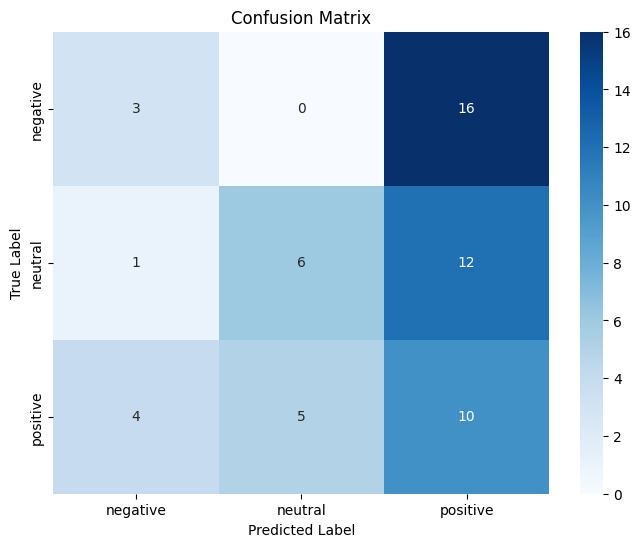

In [28]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df['true_label'] = ['negative', 'positive', 'neutral'] * (len(df) // 3) + ['negative'] * (len(df) % 3)

# Predict the labels based on the highest probability score
df['predicted_label'] = df[['negative', 'neutral', 'positive']].idxmax(axis=1)

# Calculate performance metrics
accuracy = accuracy_score(df['true_label'], df['predicted_label'])
precision = precision_score(df['true_label'], df['predicted_label'], average='weighted', zero_division=0)
recall = recall_score(df['true_label'], df['predicted_label'], average='weighted', zero_division=0)
f1 = f1_score(df['true_label'], df['predicted_label'], average='weighted', zero_division=0)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Classification report
print("\nClassification Report:")
print(classification_report(df['true_label'], df['predicted_label']))

# Confusion matrix
cm = confusion_matrix(df['true_label'], df['predicted_label'])

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [30]:
# Creating a new DataFrame for tabulation
roberta_emotions_df = df[['Filename', 'negative', 'neutral', 'positive']].copy()

# Displaying the DataFrame
roberta_emotions_df

,Filename,negative,neutral,positive
0,pro06.pdf,0.232929,0.244465,0.356210
1,pro05.pdf,0.158675,0.489987,0.253628
2,pro40.pdf,0.217797,0.219262,0.300407
3,pro41.pdf,0.313662,0.136813,0.273392
4,pro24.pdf,0.149205,0.266759,0.443049
5,pro35.pdf,0.169464,0.405572,0.129048
6,pro42.pdf,0.164679,0.217847,0.504800
7,pro02.pdf,0.198237,0.221119,0.398796
8,pro03.pdf,0.131316,0.285433,0.471589
9,pro39.pdf,0.323968,0.102416,0.133175


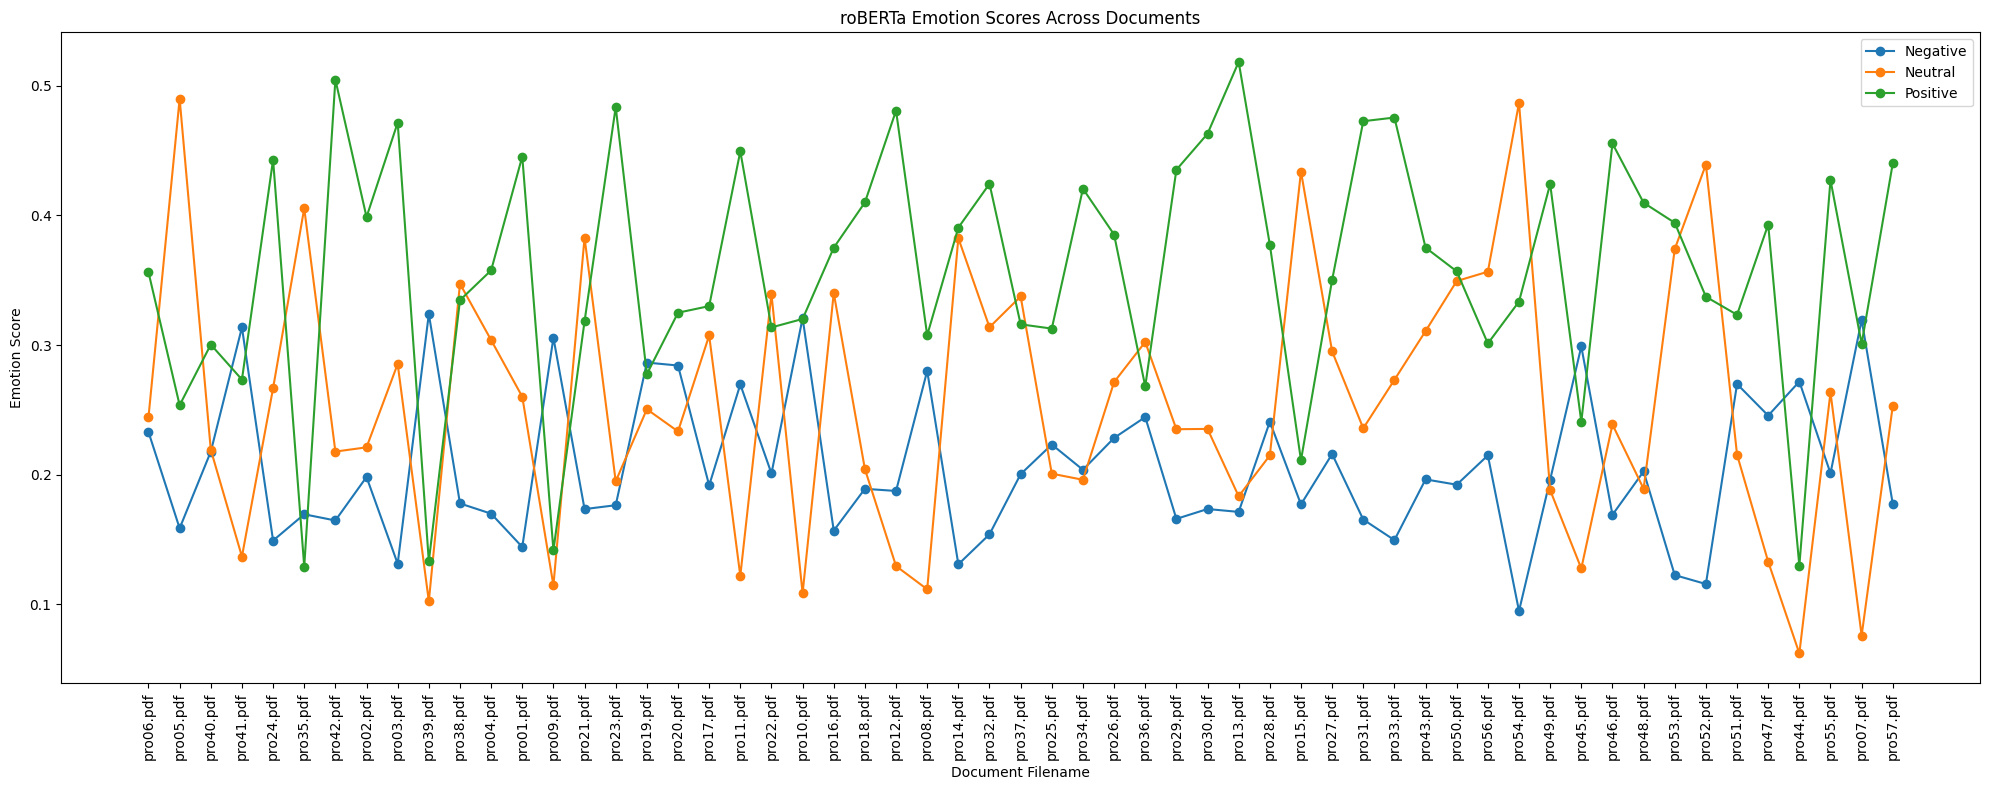

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))

# Plotting each emotion score
plt.plot(roberta_emotions_df['Filename'], roberta_emotions_df['negative'], label='Negative', marker='o')
plt.plot(roberta_emotions_df['Filename'], roberta_emotions_df['neutral'], label='Neutral', marker='o')
plt.plot(roberta_emotions_df['Filename'], roberta_emotions_df['positive'], label='Positive', marker='o')


# Customizing the plot
plt.title('roBERTa Emotion Scores Across Documents')
plt.xlabel('Document Filename')
plt.ylabel('Emotion Score')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [32]:
# Find the dominant emotion for each paper
roberta_emotions_df['dominant_emotion'] = roberta_emotions_df[['negative', 'neutral', 'positive']].idxmax(axis=1)

# Creating a table showing only the dominant emotion for each paper
dominant_emotions_table = roberta_emotions_df[['Filename', 'dominant_emotion']]

# Displaying the table
dominant_emotions_table


,Filename,dominant_emotion
0,pro06.pdf,positive
1,pro05.pdf,neutral
2,pro40.pdf,positive
3,pro41.pdf,negative
4,pro24.pdf,positive
5,pro35.pdf,neutral
6,pro42.pdf,positive
7,pro02.pdf,positive
8,pro03.pdf,positive
9,pro39.pdf,negative


In [33]:
pos_papers = len(roberta_emotions_df[roberta_emotions_df['dominant_emotion'] == 'positive'])
neu_papers = len(roberta_emotions_df[roberta_emotions_df['dominant_emotion'] == 'neutral'])
neg_papers = len(roberta_emotions_df[roberta_emotions_df['dominant_emotion'] == 'negative'])

print(f"Number of Papers with Positive emotion: {pos_papers}")
print(f"Number of Papers with Neutral valence: {neu_papers}")
print(f"Number of Papers with Negative emotion: {neg_papers}")


Number of Papers with Positive emotion: 38
Number of Papers with Neutral valence: 11
Number of Papers with Negative emotion: 8


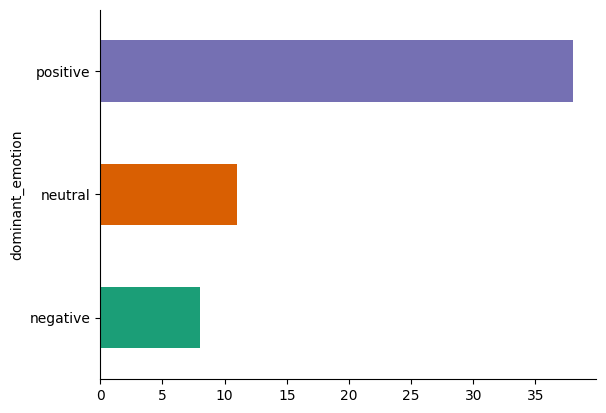

In [34]:
from matplotlib import pyplot as plt
import seaborn as sns
dominant_emotions_table.groupby('dominant_emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

    Emotion  Average Score
0  negative       0.205418
1   neutral       0.254656
2  positive       0.357908


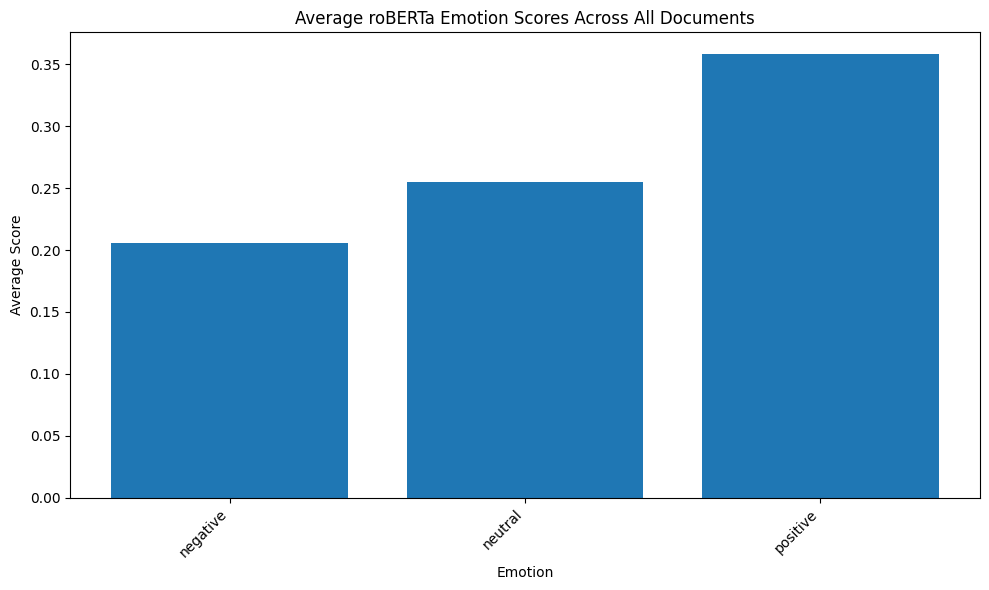

In [35]:
# Calculating the average emotion score for each emotion across all documents
average_roberta_scores = roberta_emotions_df[['negative', 'neutral', 'positive']].mean()

# Creating a new DataFrame for the average scores
average_roberta_scores_df = pd.DataFrame({'Emotion': average_roberta_scores.index, 'Average Score': average_roberta_scores.values})

# Displaying the average scores in a table
print(average_roberta_scores_df)

# Creating a bar chart of the average emotion scores
plt.figure(figsize=(10, 6))
plt.bar(average_roberta_scores_df['Emotion'], average_roberta_scores_df['Average Score'])
plt.xlabel('Emotion')
plt.ylabel('Average Score')
plt.title('Average roBERTa Emotion Scores Across All Documents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **VADER**

In [36]:
import spacy

# Load English model for spaCy
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    """
    Tokenizes, removes stopwords/punctuation, and lemmatizes the input text.
    Returns a string of processed tokens.
    """
    doc = nlp(text)
    tokens = []
    for token in doc:
        # Exclude stopwords, punctuation, and space tokens
        if not token.is_stop and not token.is_punct and not token.is_space:
            # Lemmatizin and lowercase
            tokens.append(token.lemma_.lower())
    return " ".join(tokens)

# Apply the preprocessing to each document
df["clean_content"] = df["Content"].apply(preprocess_text)
print(df[["Filename", "clean_content"]].head(57))

     Filename                                      clean_content
0   pro06.pdf  bank branches smart environments introduce cog...
1   pro05.pdf  promote sme innovation collaboration collectiv...
2   pro40.pdf  cognitive based decision support water managem...
3   pro41.pdf  achieve smart water network management semanti...
4   pro24.pdf  development collaborative platform closed loop...
5   pro35.pdf  robot love build consciousness models use huma...
6   pro42.pdf  collaborative network district energy operatio...
7   pro02.pdf  collaborative transformation systems path addr...
8   pro03.pdf  need solution transform manufacturing industry...
9   pro39.pdf  ontology base semantic modeling automated iden...
10  pro38.pdf  cognitive services collaborative mhealth onpar...
11  pro04.pdf  collaborative networks regions future andrew c...
12  pro01.pdf  relevance blockchain collaborative networked o...
13  pro09.pdf  optimize humanitarian aids formulating influen...
14  pro21.pdf  complex co

In [37]:
!pip install pandas nltk textblob vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.2 MB/s eta 0:00:00


In [38]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initializing VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get VADER scores
def get_vader_scores(text):
    scores = sia.polarity_scores(text)
    return scores

# Applying VADER analysis to the cleaned content
df['vader_scores'] = df['clean_content'].apply(get_vader_scores)

# Extracting individual sentiment scores
df['vader_neg'] = df['vader_scores'].apply(lambda x: x['neg'])
df['vader_neu'] = df['vader_scores'].apply(lambda x: x['neu'])
df['vader_pos'] = df['vader_scores'].apply(lambda x: x['pos'])
df['vader_compound'] = df['vader_scores'].apply(lambda x: x['compound'])

# Displaying the DataFrame with VADER scores
print(df[['Filename', 'clean_content', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']])


     Filename                                      clean_content  vader_neg  \
0   pro06.pdf  bank branches smart environments introduce cog...      0.096   
1   pro05.pdf  promote sme innovation collaboration collectiv...      0.027   
2   pro40.pdf  cognitive based decision support water managem...      0.018   
3   pro41.pdf  achieve smart water network management semanti...      0.048   
4   pro24.pdf  development collaborative platform closed loop...      0.015   
5   pro35.pdf  robot love build consciousness models use huma...      0.041   
6   pro42.pdf  collaborative network district energy operatio...      0.016   
7   pro02.pdf  collaborative transformation systems path addr...      0.035   
8   pro03.pdf  need solution transform manufacturing industry...      0.013   
9   pro39.pdf  ontology base semantic modeling automated iden...      0.064   
10  pro38.pdf  cognitive services collaborative mhealth onpar...      0.006   
11  pro04.pdf  collaborative networks regions future

Accuracy: 0.3333
Precision: 0.1965
Recall: 0.3333
F1-score: 0.1957
              precision    recall  f1-score   support

    negative       0.25      0.05      0.09        19
     neutral       0.00      0.00      0.00        19
    positive       0.34      0.95      0.50        19

    accuracy                           0.33        57
   macro avg       0.20      0.33      0.20        57
weighted avg       0.20      0.33      0.20        57



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


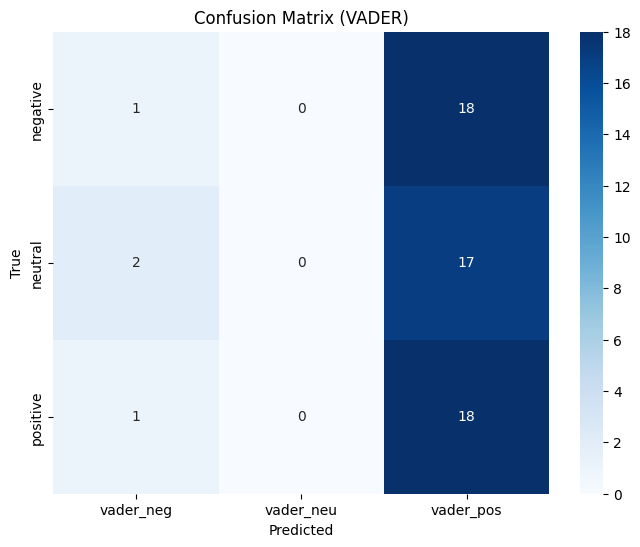

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


df['vader_predicted_sentiment'] = df['vader_compound'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))


true_sentiments = ['positive', 'negative', 'neutral'] * (len(df) // 3) + ['positive'] * (len(df) % 3)

# Now assign the list to the DataFrame column
df['true_sentiment'] = true_sentiments


# Evaluation metrics

accuracy = accuracy_score(df['true_sentiment'], df['vader_predicted_sentiment'])
precision = precision_score(df['true_sentiment'], df['vader_predicted_sentiment'], average='weighted', zero_division=0)
recall = recall_score(df['true_sentiment'], df['vader_predicted_sentiment'], average='weighted', zero_division=0)
f1 = f1_score(df['true_sentiment'], df['vader_predicted_sentiment'], average='weighted', zero_division=0)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Classification Report
print(classification_report(df['true_sentiment'], df['vader_predicted_sentiment']))

# Confusion Matrix
cm = confusion_matrix(df['true_sentiment'], df['vader_predicted_sentiment'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['vader_neg', 'vader_neu', 'vader_pos'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (VADER)')
plt.show()

In [40]:
# Create a new DataFrame for tabulation
vader_df = df[['Filename', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']].copy()

# Display the DataFrame
vader_df


,Filename,vader_neg,vader_neu,vader_pos,vader_compound
0,pro06.pdf,0.096,0.726,0.178,0.9997
1,pro05.pdf,0.027,0.755,0.218,0.9998
2,pro40.pdf,0.018,0.852,0.130,0.9998
3,pro41.pdf,0.048,0.834,0.118,0.9993
4,pro24.pdf,0.015,0.869,0.116,0.9995
5,pro35.pdf,0.041,0.786,0.173,0.9998
6,pro42.pdf,0.016,0.804,0.180,0.9999
7,pro02.pdf,0.035,0.700,0.265,1.0000
8,pro03.pdf,0.013,0.852,0.134,0.9998
9,pro39.pdf,0.064,0.867,0.069,0.4696


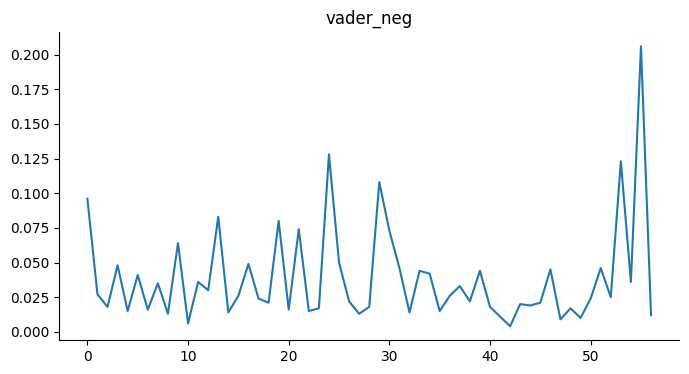

In [41]:
from matplotlib import pyplot as plt
vader_df['vader_neg'].plot(kind='line', figsize=(8, 4), title='vader_neg')
plt.gca().spines[['top', 'right']].set_visible(False)

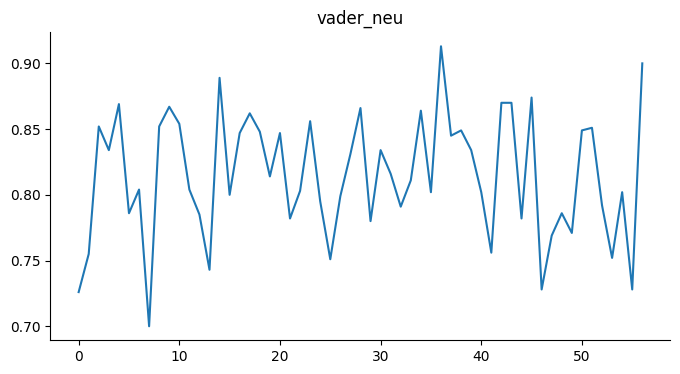

In [42]:
from matplotlib import pyplot as plt
vader_df['vader_neu'].plot(kind='line', figsize=(8, 4), title='vader_neu')
plt.gca().spines[['top', 'right']].set_visible(False)

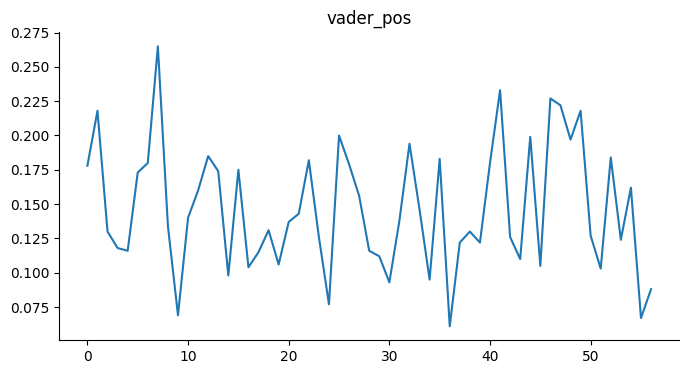

In [43]:
from matplotlib import pyplot as plt
vader_df['vader_pos'].plot(kind='line', figsize=(8, 4), title='vader_pos')
plt.gca().spines[['top', 'right']].set_visible(False)

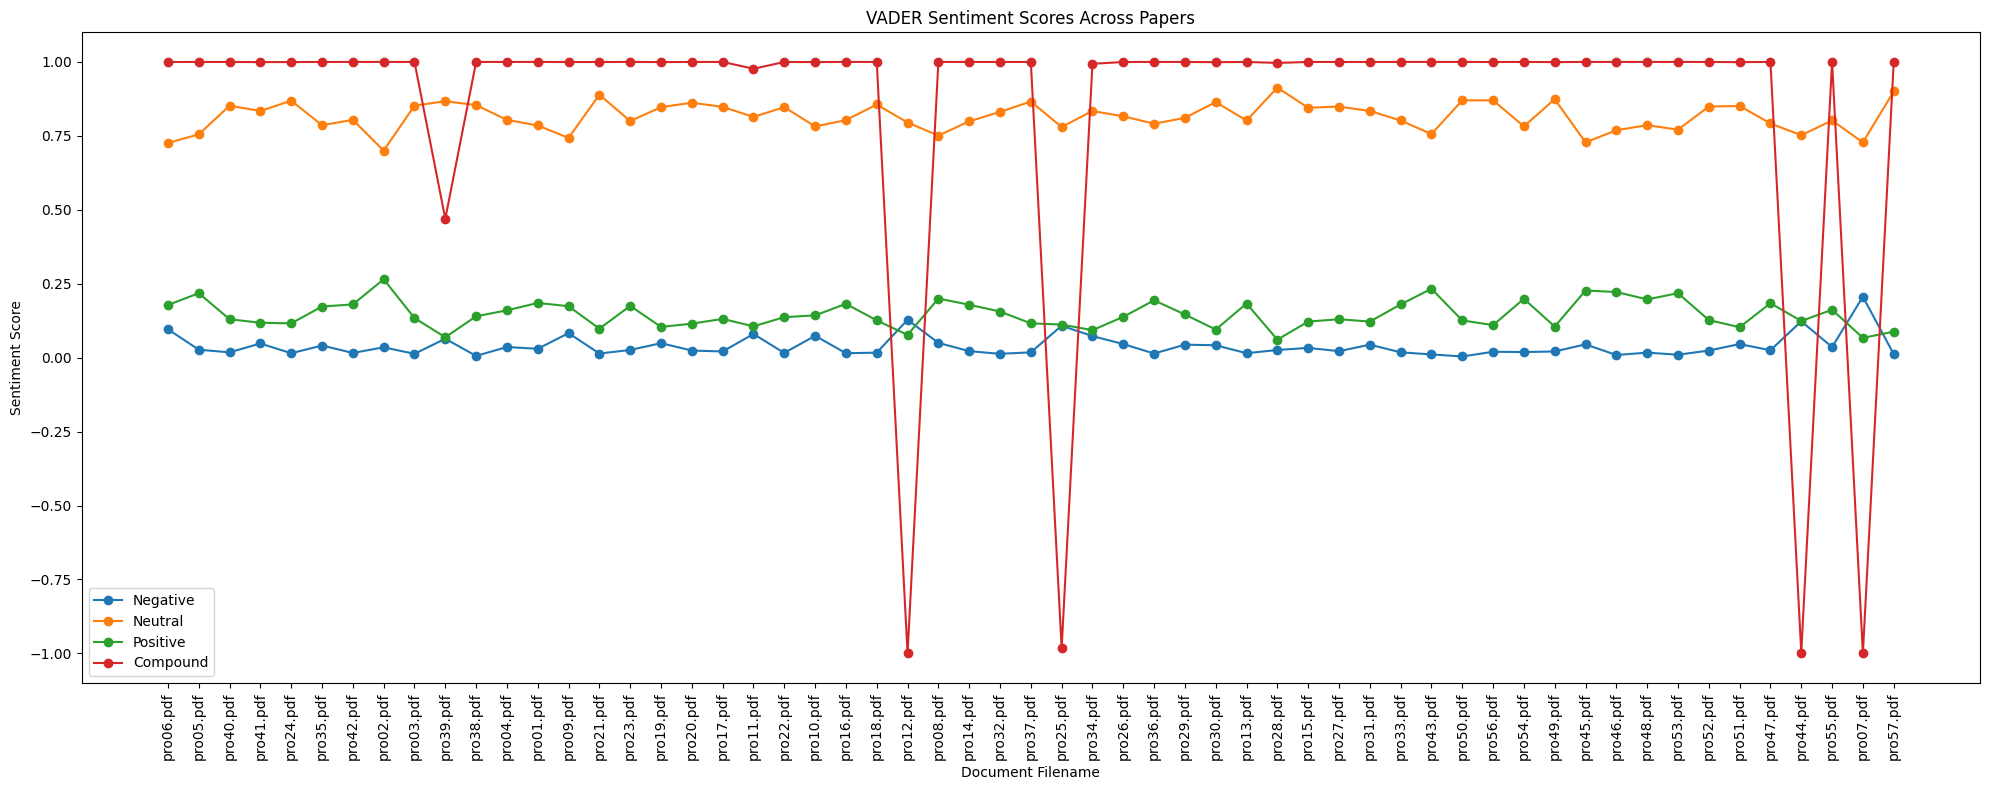

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))

# Plotting each sentiment score
plt.plot(vader_df['Filename'], vader_df['vader_neg'], label='Negative', marker='o')
plt.plot(vader_df['Filename'], vader_df['vader_neu'], label='Neutral', marker='o')
plt.plot(vader_df['Filename'], vader_df['vader_pos'], label='Positive', marker='o')
plt.plot(vader_df['Filename'], vader_df['vader_compound'], label='Compound', marker='o')

# Customize the plot
plt.title('VADER Sentiment Scores Across Papers')
plt.xlabel('Document Filename')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


   Sentiment  Average Score
0  vader_neg       0.038737
1  vader_neu       0.814772
2  vader_pos       0.146544


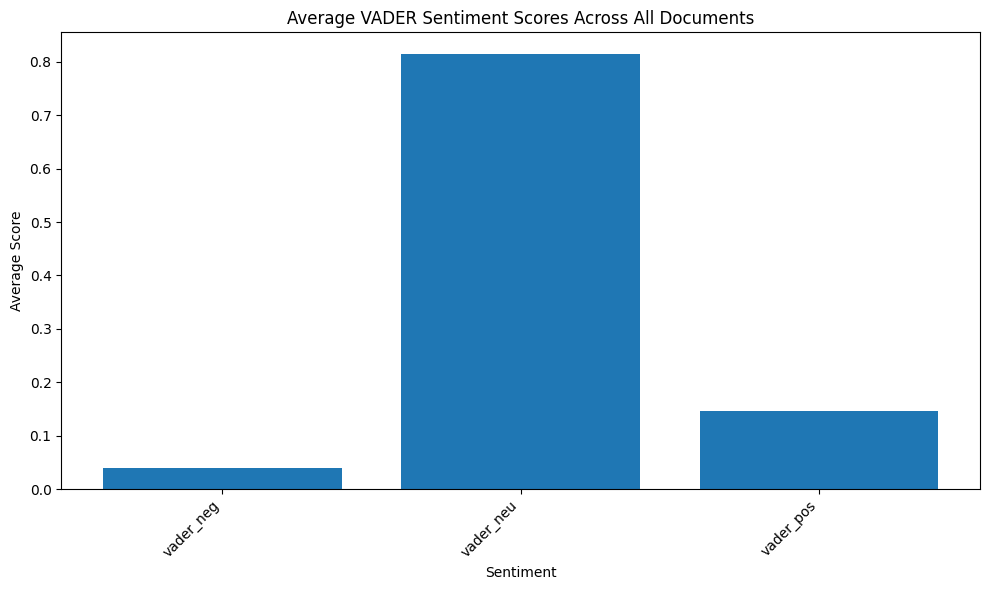

In [45]:
# Calculating the average sentiment scores
average_vader_scores = vader_df[['vader_neg', 'vader_neu', 'vader_pos']].mean()

# Creating a new DataFrame for the average scores
average_vader_scores_df = pd.DataFrame({'Sentiment': average_vader_scores.index, 'Average Score': average_vader_scores.values})

# Displaying the average scores in a table
print(average_vader_scores_df)

# Creating a bar chart of the average sentiment scores
plt.figure(figsize=(10, 6))
plt.bar(average_vader_scores_df['Sentiment'], average_vader_scores_df['Average Score'])
plt.xlabel('Sentiment')
plt.ylabel('Average Score')
plt.title('Average VADER Sentiment Scores Across All Documents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


     Filename dominant_sentiment
0   pro06.pdf          vader_neu
1   pro05.pdf          vader_neu
2   pro40.pdf          vader_neu
3   pro41.pdf          vader_neu
4   pro24.pdf          vader_neu
5   pro35.pdf          vader_neu
6   pro42.pdf          vader_neu
7   pro02.pdf          vader_neu
8   pro03.pdf          vader_neu
9   pro39.pdf          vader_neu
10  pro38.pdf          vader_neu
11  pro04.pdf          vader_neu
12  pro01.pdf          vader_neu
13  pro09.pdf          vader_neu
14  pro21.pdf          vader_neu
15  pro23.pdf          vader_neu
16  pro19.pdf          vader_neu
17  pro20.pdf          vader_neu
18  pro17.pdf          vader_neu
19  pro11.pdf          vader_neu
20  pro22.pdf          vader_neu
21  pro10.pdf          vader_neu
22  pro16.pdf          vader_neu
23  pro18.pdf          vader_neu
24  pro12.pdf          vader_neu
25  pro08.pdf          vader_neu
26  pro14.pdf          vader_neu
27  pro32.pdf          vader_neu
28  pro37.pdf          vader_neu
29  pro25.

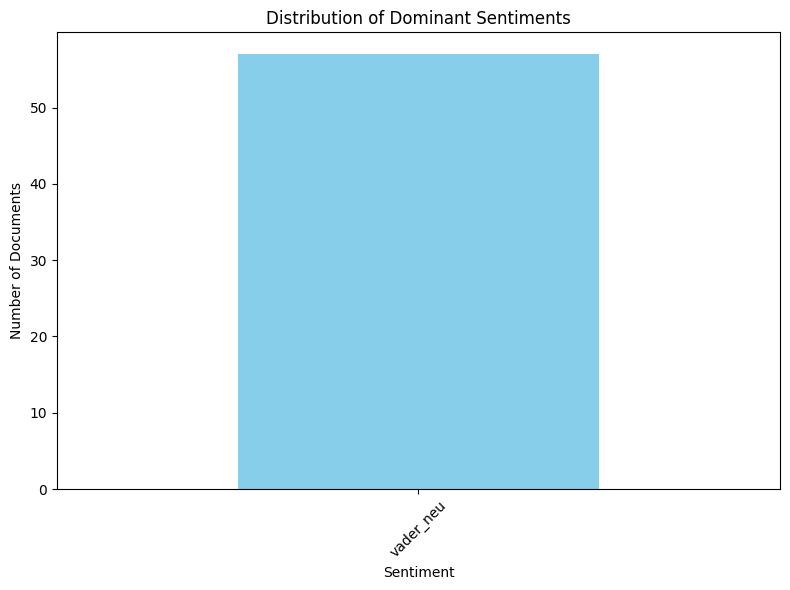

In [46]:
vader_df['dominant_sentiment'] = vader_df[['vader_neg', 'vader_neu', 'vader_pos']].idxmax(axis=1)

# Creating a table showing only the dominant sentiment for each paper
dominant_sentiments_table = vader_df[['Filename', 'dominant_sentiment']]

# Display the table
print(dominant_sentiments_table)

sentiment_counts = dominant_sentiments_table['dominant_sentiment'].value_counts()
print(sentiment_counts)

# Creating a bar plot of the dominant sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Dominant Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Documents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [47]:
# Define thresholds for categorization
def categorize_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'neutral'
    else:
        return 'negative'

# Apply categorization using the 'vader_compound' column from the DataFrame
df['vader_sentiment'] = df['vader_compound'].apply(categorize_sentiment)


# Defining thresholds for categorization
def categorize_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Applying categorization
df['vader_sentiment'] = df['vader_compound'].apply(categorize_sentiment)

# Counting the number of papers in each category
sentiment_counts = df['vader_sentiment'].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)

Sentiment Distribution:
vader_sentiment
positive    53
negative     4
Name: count, dtype: int64


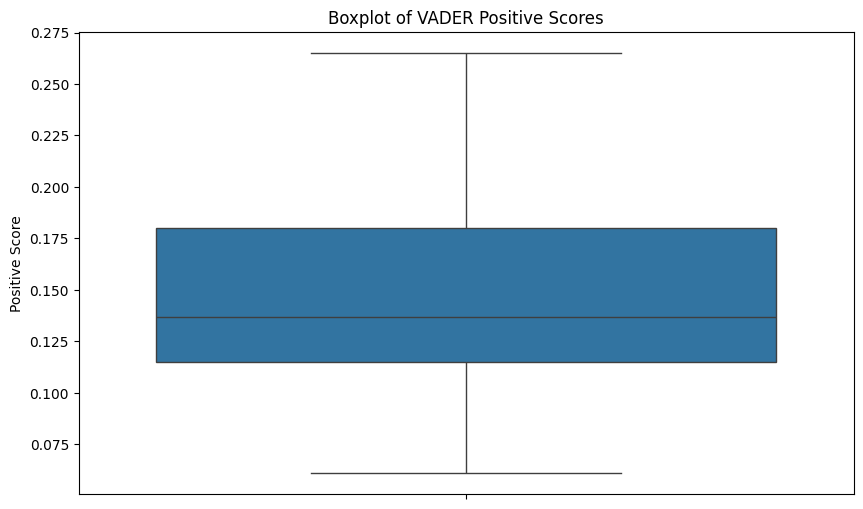

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['vader_pos'])
plt.title('Boxplot of VADER Positive Scores')
plt.ylabel('Positive Score')
plt.show()

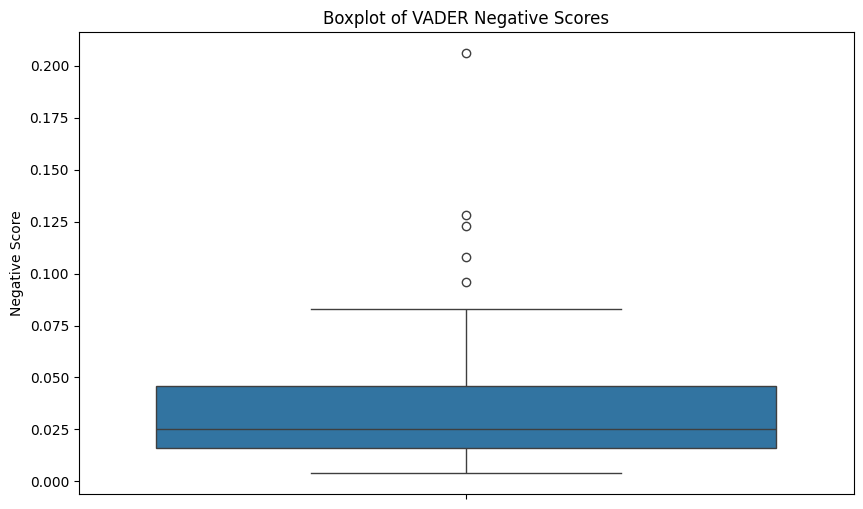

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['vader_neg'])
plt.title('Boxplot of VADER Negative Scores')
plt.ylabel('Negative Score')
plt.show()

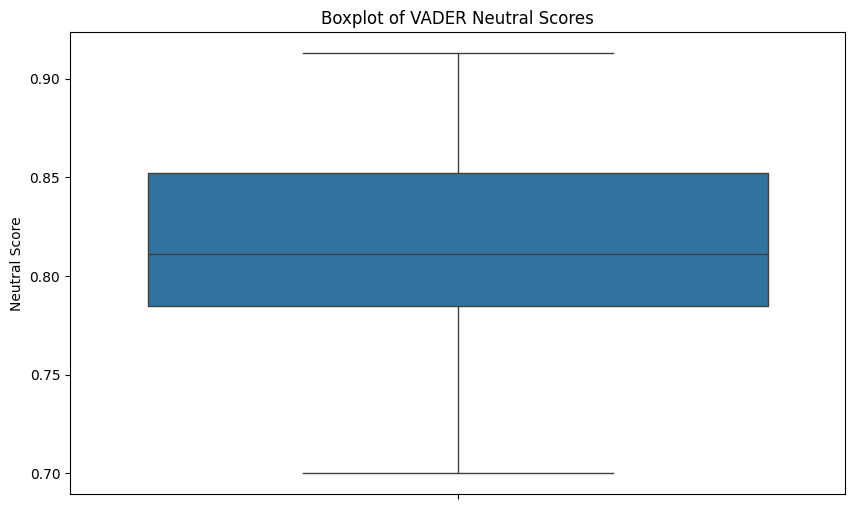

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['vader_neu'])
plt.title('Boxplot of VADER Neutral Scores')
plt.ylabel('Neutral Score')
plt.show()

In [51]:
# Papers with the most positive sentiment
print("Most Positive Papers:")
print(df.nlargest(5, 'vader_pos')[['Filename', 'vader_pos', 'clean_content']])

# Papers with the most negative sentiment
print("\nMost Negative Papers:")
print(df.nsmallest(5, 'vader_neg')[['Filename', 'vader_neg', 'clean_content']])

# Papers with the most negative sentiment
print("\nMost Neutral Papers:")
print(df.nsmallest(5, 'vader_neu')[['Filename', 'vader_neu', 'clean_content']])

Most Positive Papers:
     Filename  vader_pos                                      clean_content
7   pro02.pdf      0.265  collaborative transformation systems path addr...
41  pro43.pdf      0.233  control chart support trust monitoring dynamic...
46  pro45.pdf      0.227  approach surfacing hidden intentions trustwort...
47  pro46.pdf      0.222  virtual collaborative platform support buildin...
1   pro05.pdf      0.218  promote sme innovation collaboration collectiv...

Most Negative Papers:
     Filename  vader_neg                                      clean_content
42  pro50.pdf      0.004  fiware open source standard platform smart far...
10  pro38.pdf      0.006  cognitive services collaborative mhealth onpar...
47  pro46.pdf      0.009  virtual collaborative platform support buildin...
49  pro53.pdf      0.010  business roles create value data collaborative...
41  pro43.pdf      0.011  control chart support trust monitoring dynamic...

Most Neutral Papers:
     Filename  vader_